# Reading files

For further processing, we need a bit of information on each data set:
- Structure 
- which scans should show the blocked current, which the unblocked?
- In which directions to the triangles point? We will homogenise this during data processing
- Is the current in the triangle higher or lower than the surrounding? (i.e. is this consistent with the current tag?)


For the output we need a size in pixels and the approximate margin between the triangles and the border.

Additionally, each data set needs to be provided a set of blobs that identifies bias triangles (or run blob detection), a set that tells is if the blobs are actually triangles or noise detected by the blob detection, and a set that tells us where Pauli spin blockade is actually observed. Those labels were done manually.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

from utils import processing

import pickle

In [2]:
output_size = None  # (num_px, num_px) or "None" to leave unchanged
margin = 30  # percentage of scan that should be margin

In [3]:
device_type = "finfets"

if device_type == "finfets":
    data_sets = [
        "201910_Basel_FinFET",
        "202008_Basel_FinFET",
        "202010_Basel_FinFET",
        "202011_Basel_FinFET",
        "202012_Basel_FinFET",
    ]

In [4]:
reload(processing)

verbose = False

imgs, labels, names, device_name = [], [], [], []

for this_data_set in data_sets:
    data, configs = processing.load(this_data_set, verbose=verbose)

    # cut out the triangles and attach them to the data file
    data = processing.cutout_and_attach(data, configs, margin, verbose=verbose)

    i, l, n, d = processing.export_same_bias(
        data, this_data_set, configs, output_size, verbose=verbose
    )

    for indvidual_img in i:
        imgs.append(indvidual_img)
    labels = np.hstack((labels, l))
    names = np.hstack((names, n))
    device_name = np.hstack((device_name, d))

loading 201910_Basel_FinFET
cutting
loading 202008_Basel_FinFET
cutting
loading 202010_Basel_FinFET
cutting
loading 202011_Basel_FinFET
cutting
loading 202012_Basel_FinFET
cutting


In [5]:
len(imgs)

71

The dataset contains some samples that are ambiguous. We exclude them:

In [6]:
filter_labels = np.load("../../processed_data/finfets_names.npy")

In [7]:
filtered_imgs = []
filtered_names = []
filtered_device_names = []
filtered_psb_labels = []
for img, name, device, label in zip(imgs, names, device_name, labels):
    if name in filter_labels:
        filtered_imgs.append(img)
        filtered_names.append(name)
        filtered_device_names.append(device)
        filtered_psb_labels.append(label)

Now we have the data set used in the publication:

In [8]:
len(filtered_imgs)

53

You can save them like this

In [9]:
# np.save('data/'+device_type+'_imgs.npy',imgs)
# np.save('data/'+device_type+'_labels.npy',labels)
# np.save('data/'+device_type+'_names.npy',names)
# np.save('data/'+device_type+'_device_names.npy',device_name)

# pickle.dump(data, open('data/'+device_type+'_data.pkl', 'wb'))

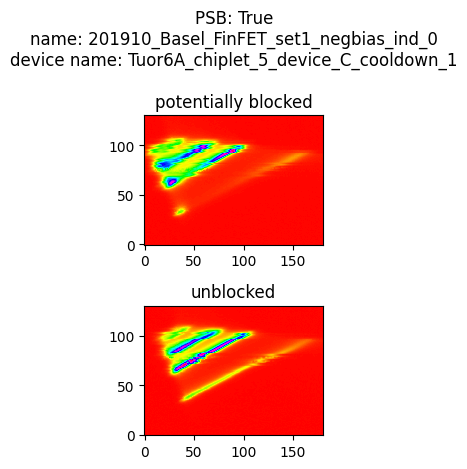

**************************************************


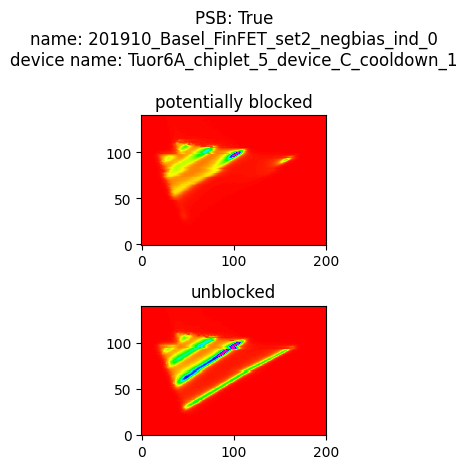

**************************************************


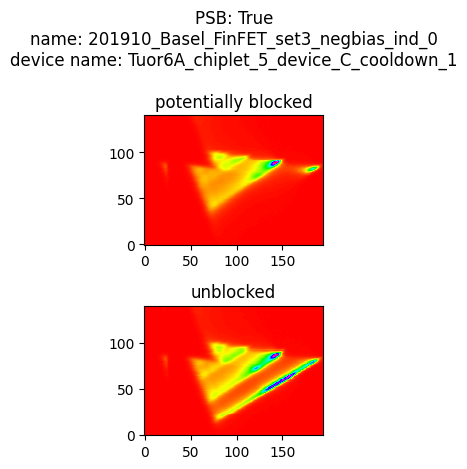

**************************************************


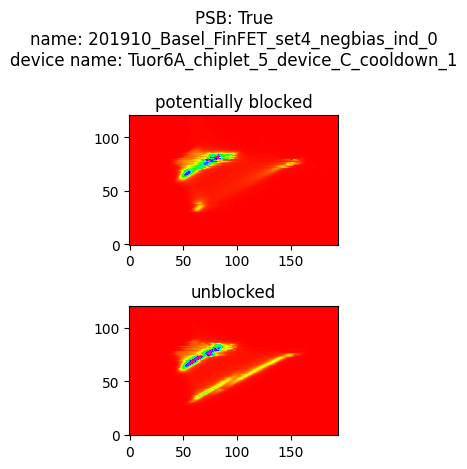

**************************************************


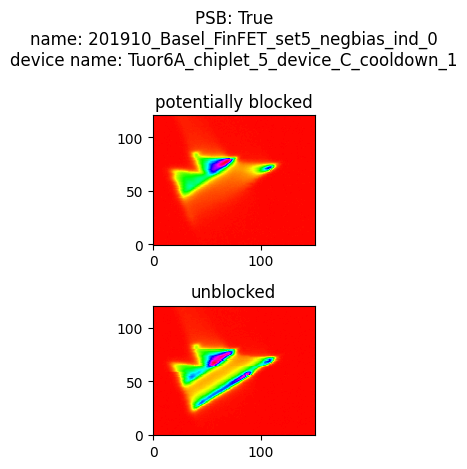

**************************************************


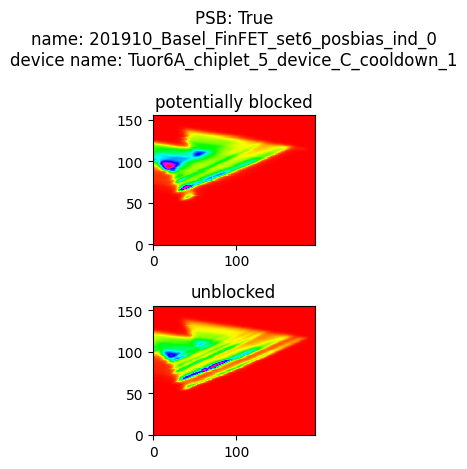

**************************************************


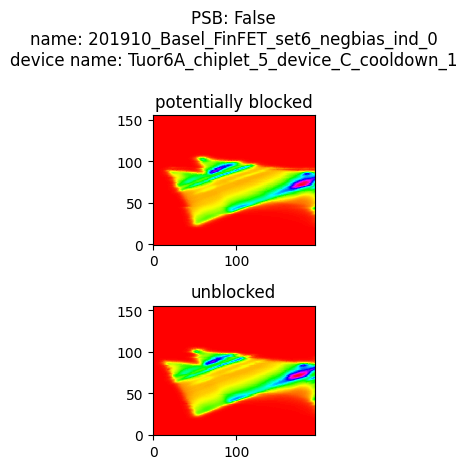

**************************************************


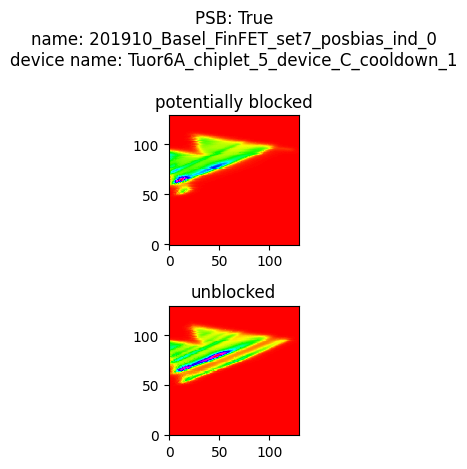

**************************************************


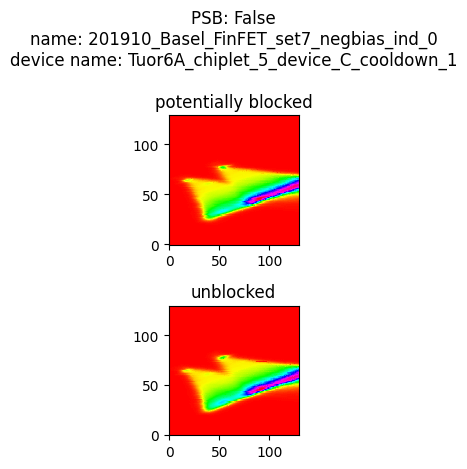

**************************************************


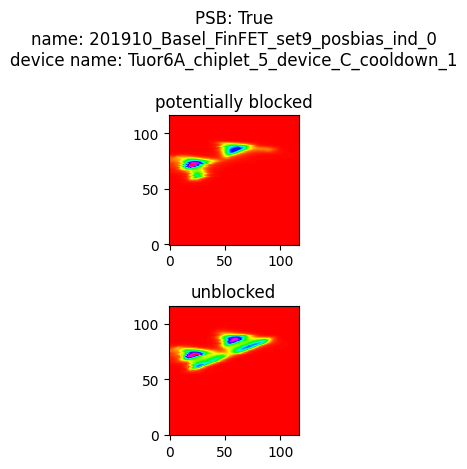

**************************************************


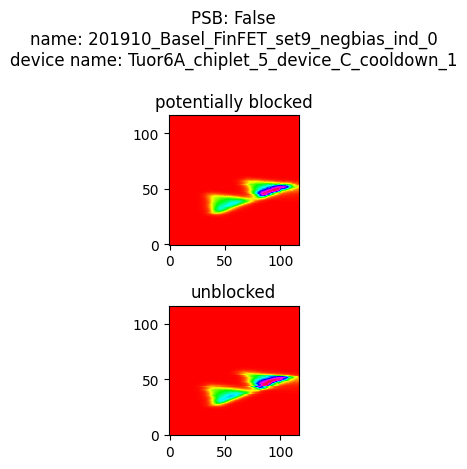

**************************************************


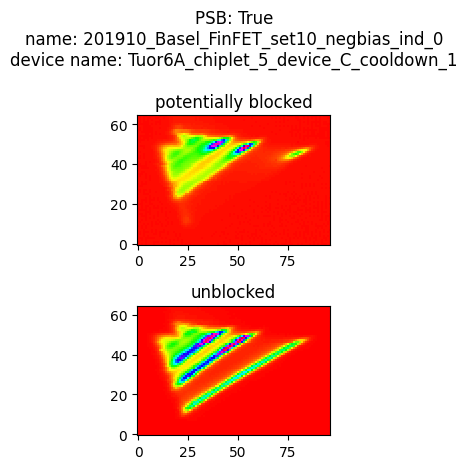

**************************************************


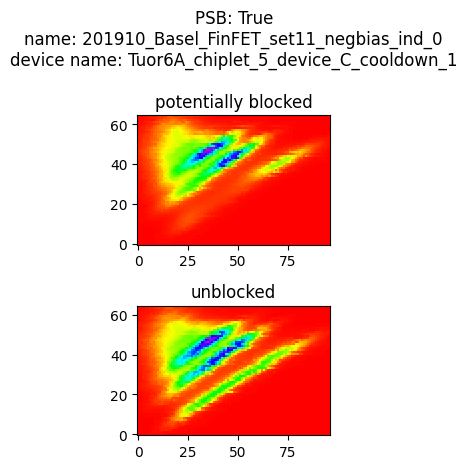

**************************************************


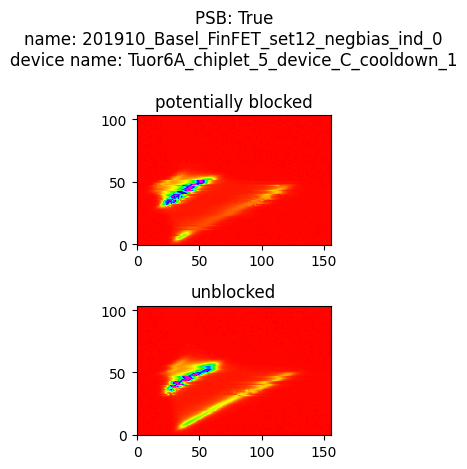

**************************************************


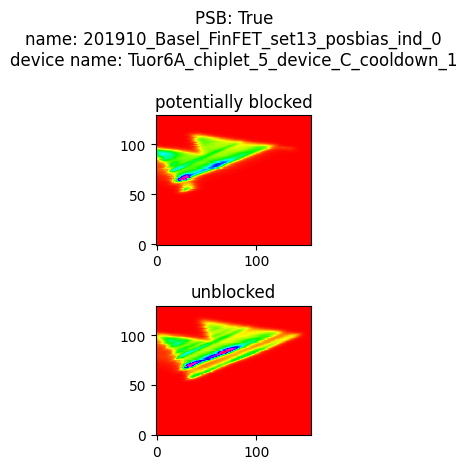

**************************************************


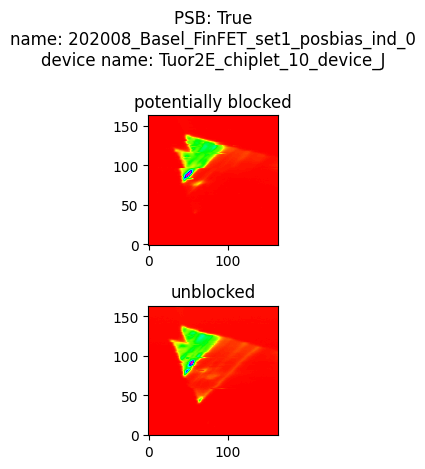

**************************************************


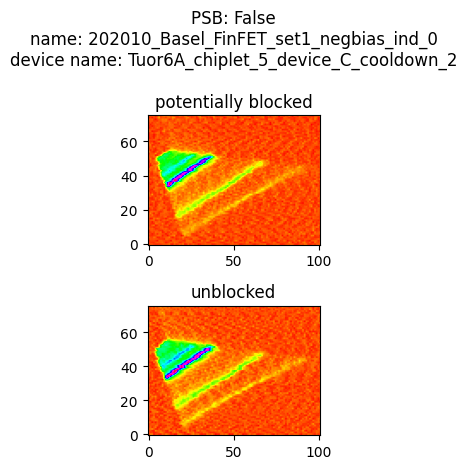

**************************************************


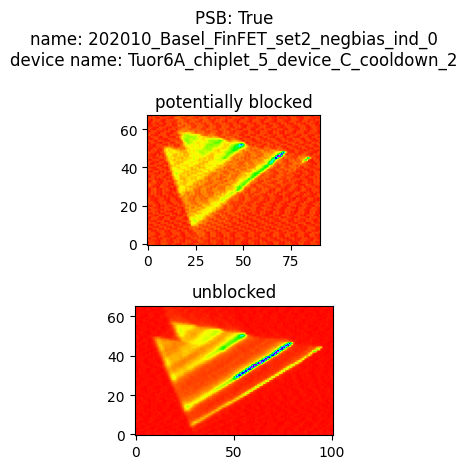

**************************************************


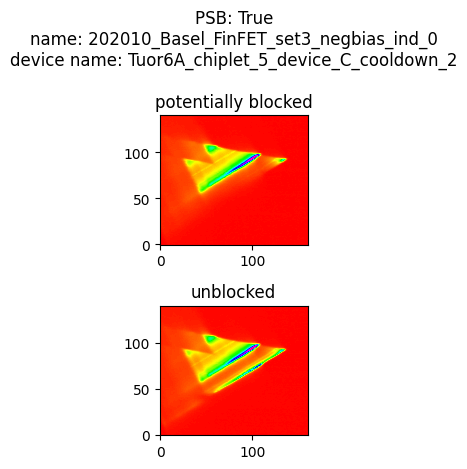

**************************************************


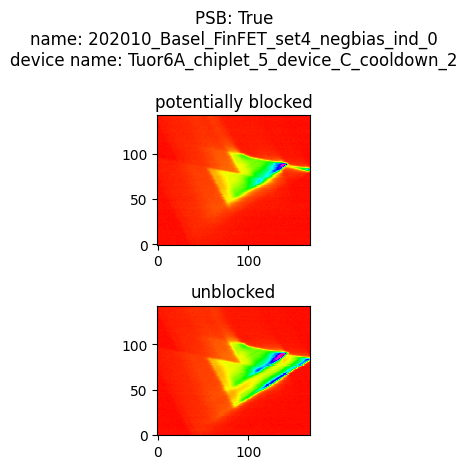

**************************************************


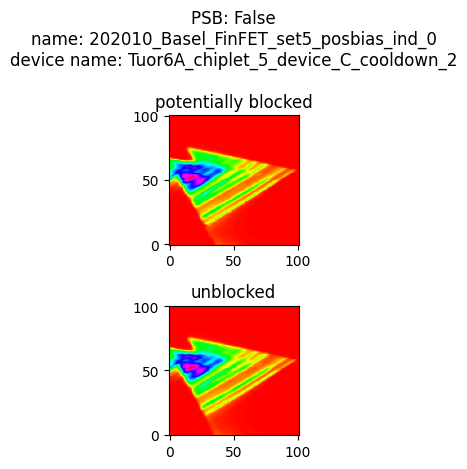

**************************************************


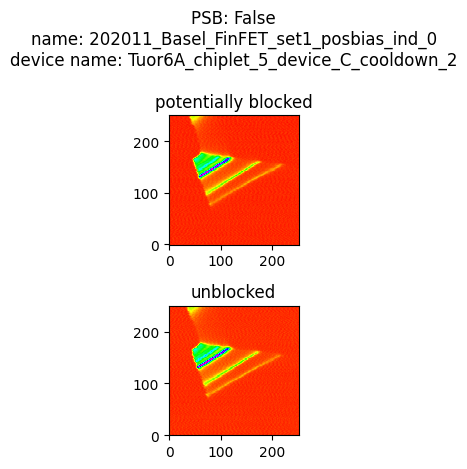

**************************************************


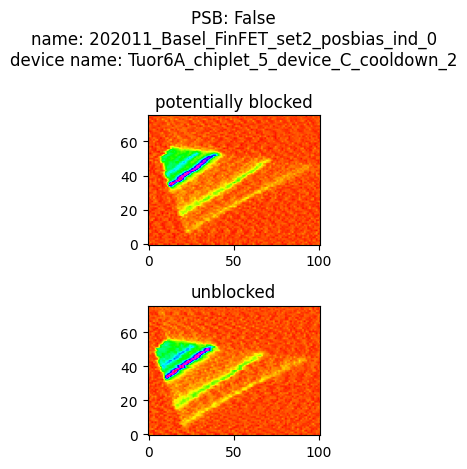

**************************************************


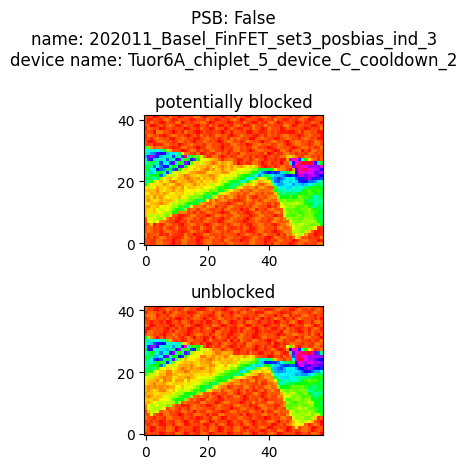

**************************************************


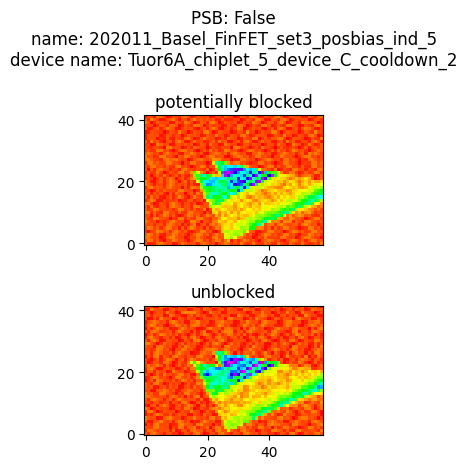

**************************************************


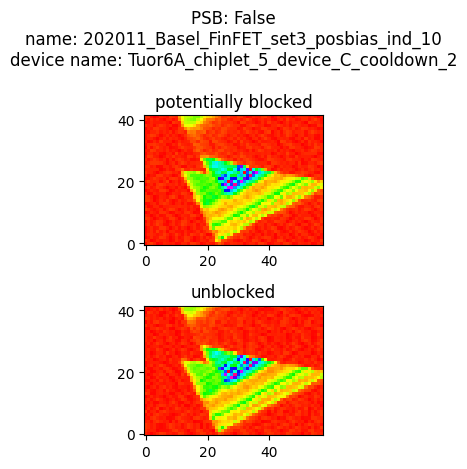

**************************************************


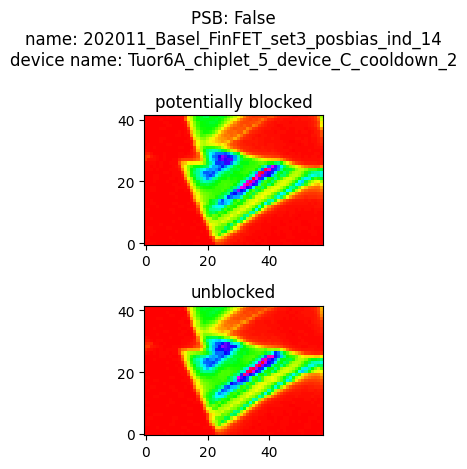

**************************************************


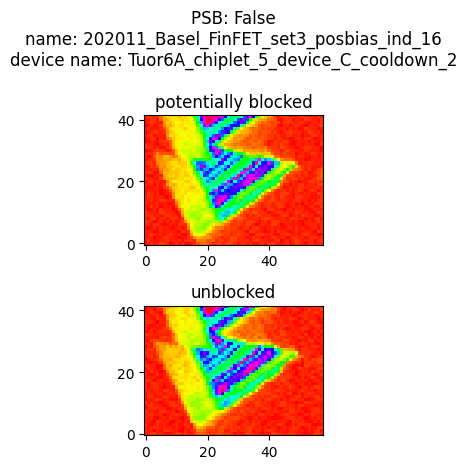

**************************************************


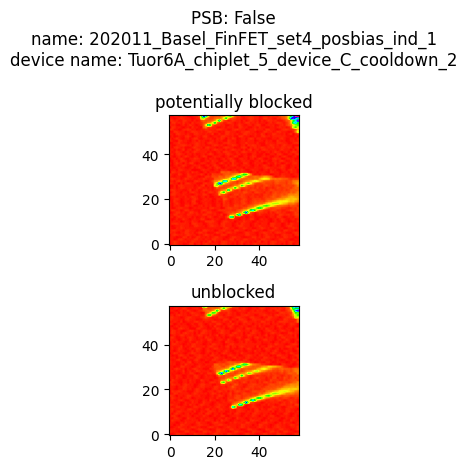

**************************************************


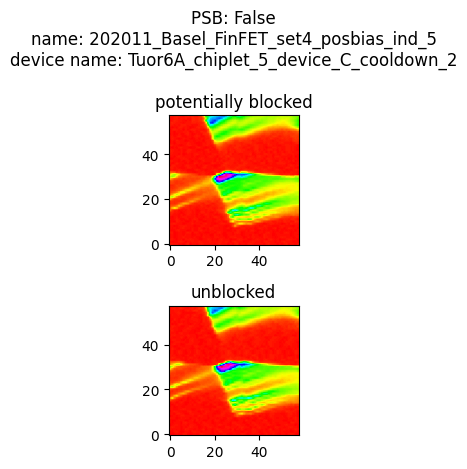

**************************************************


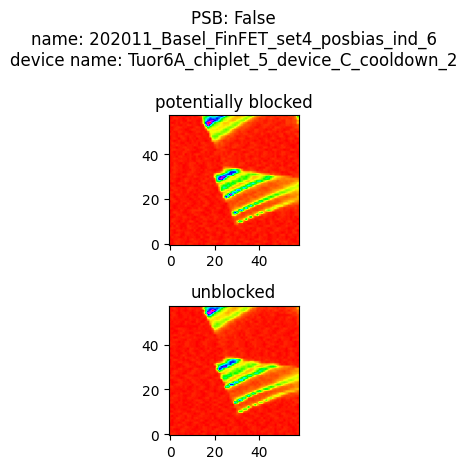

**************************************************


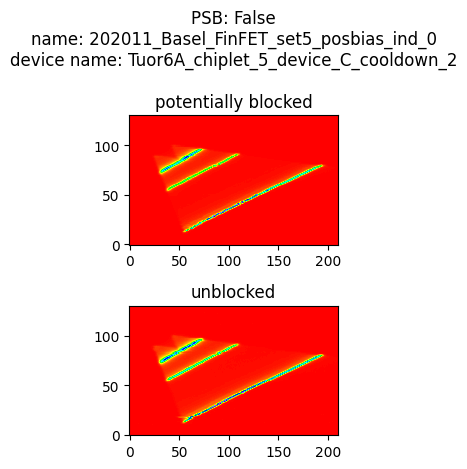

**************************************************


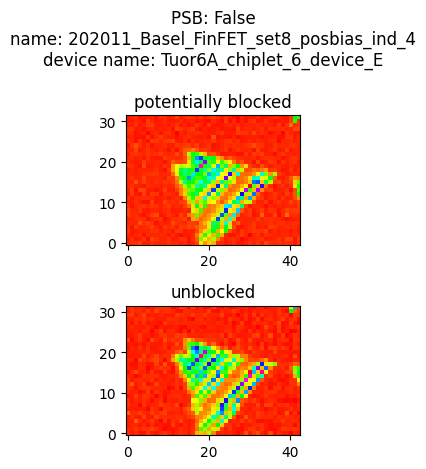

**************************************************


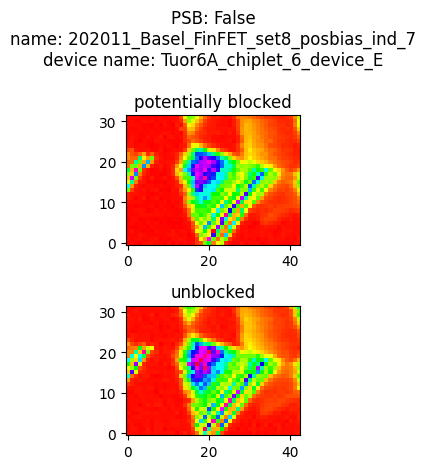

**************************************************


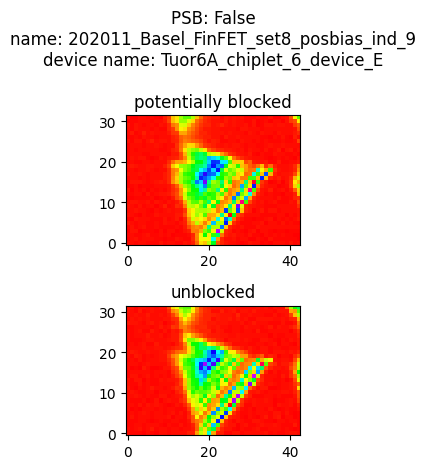

**************************************************


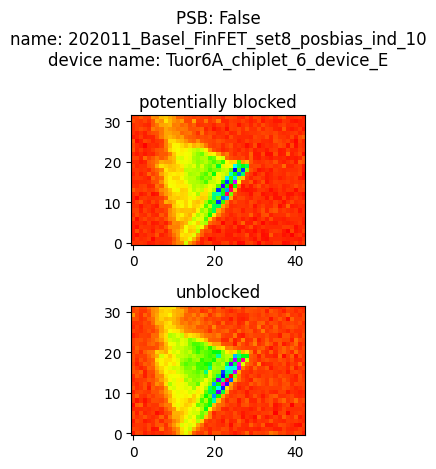

**************************************************


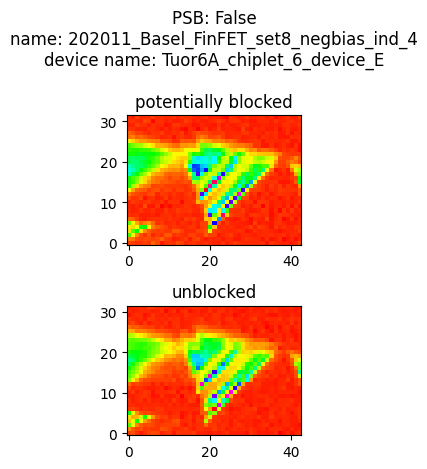

**************************************************


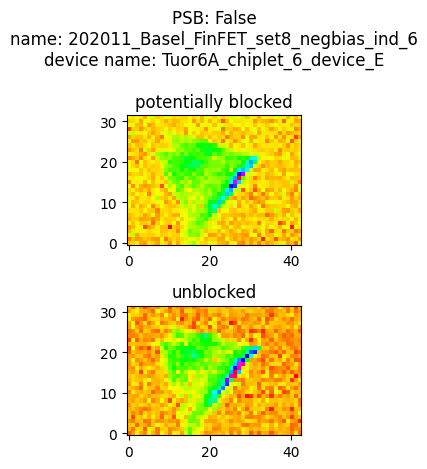

**************************************************


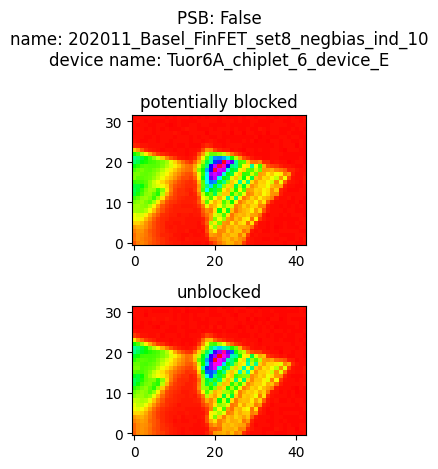

**************************************************


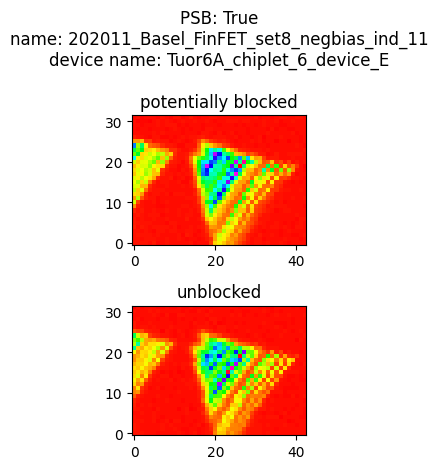

**************************************************


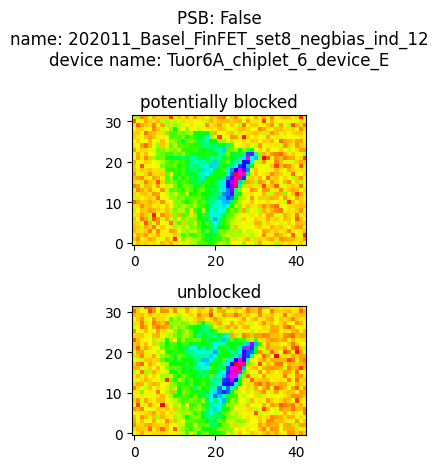

**************************************************


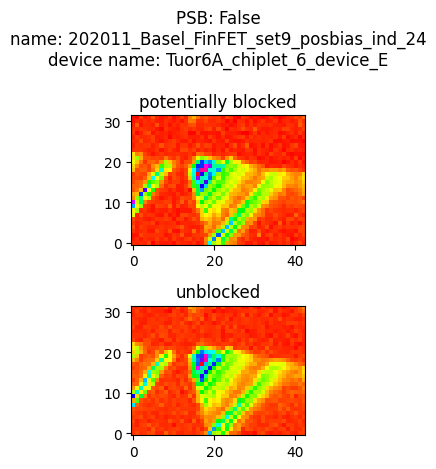

**************************************************


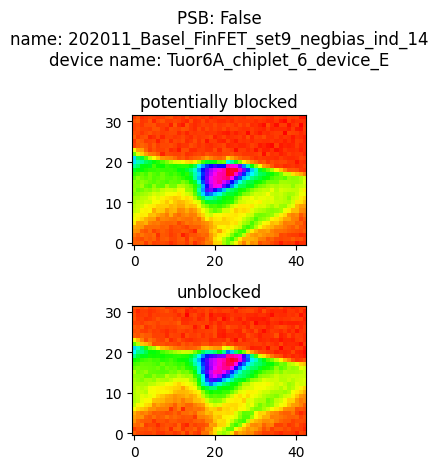

**************************************************


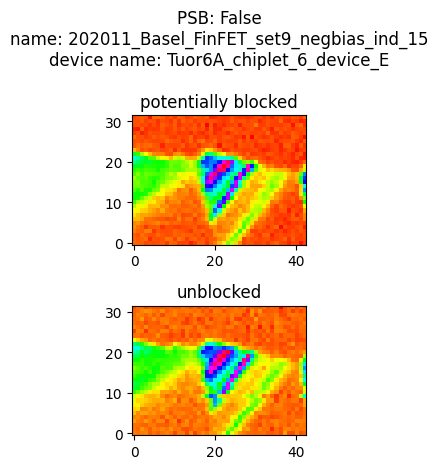

**************************************************


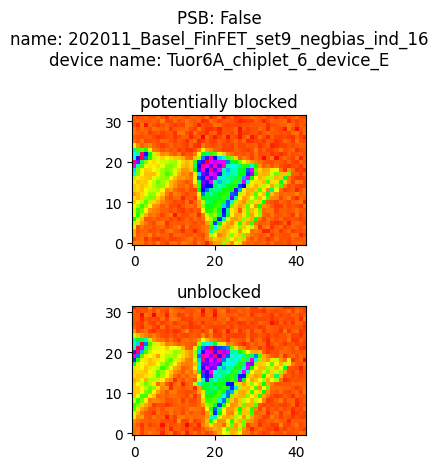

**************************************************


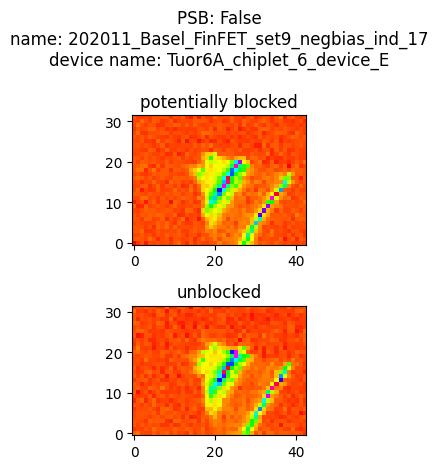

**************************************************


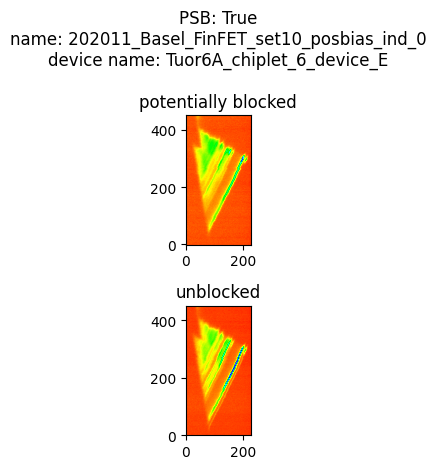

**************************************************


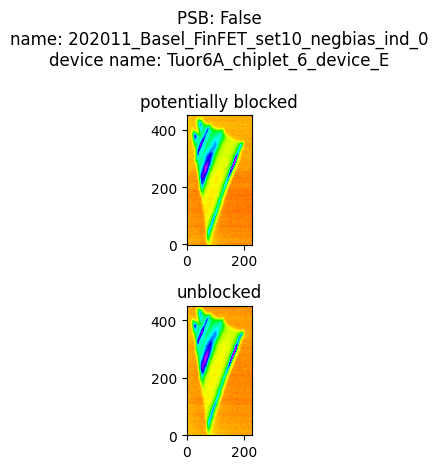

**************************************************


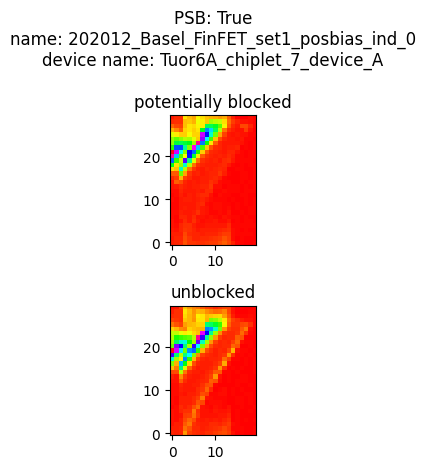

**************************************************


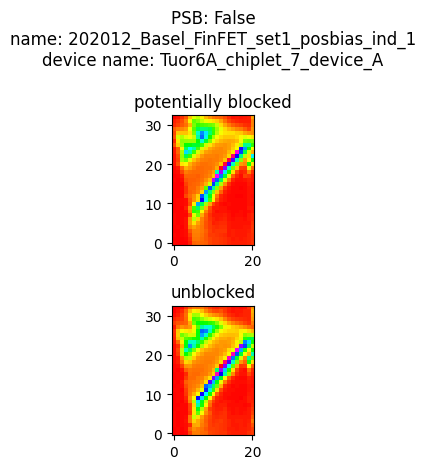

**************************************************


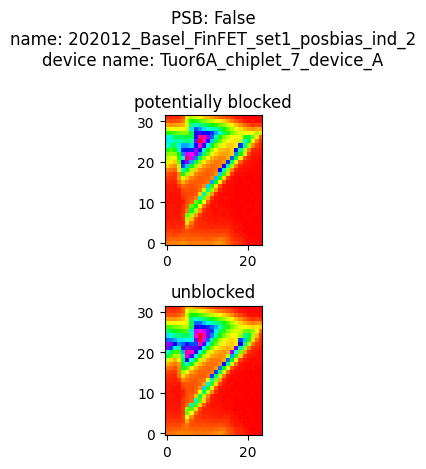

**************************************************


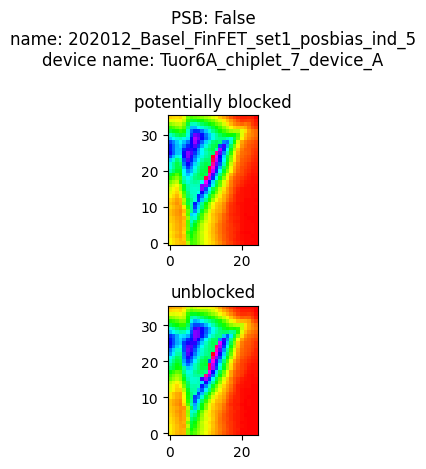

**************************************************


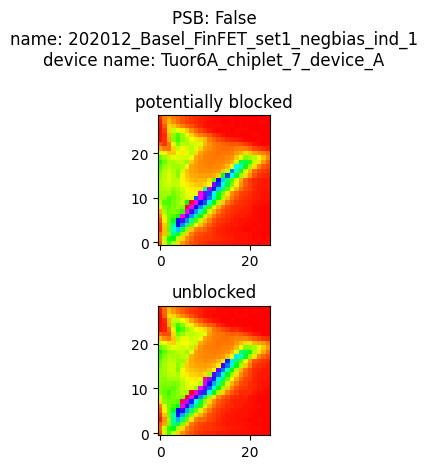

**************************************************


In [10]:
for img, label, name, device in zip(
    filtered_imgs, filtered_psb_labels, filtered_names, filtered_device_names
):
    fig, axs = plt.subplots(2, 1)
    axs[0].imshow(img[0], origin="lower", cmap="hsv")
    axs[0].set_title(
        f"PSB: {bool(label)}\nname: {name}\ndevice name: {device}\n\npotentially blocked"
    )
    axs[1].imshow(img[1], origin="lower", cmap="hsv")
    axs[1].set_title("unblocked")
    plt.tight_layout()
    plt.show()
    print("*" * 50)